In [13]:
import numpy as np
from concreteproperties.material import Concrete, SteelBar, SteelStrand
from concreteproperties.stress_strain_profile import (
    ConcreteLinear,
    RectangularStressBlock,
    SteelElasticPlastic,
    StrandProfile,
)
from sectionproperties.pre.library.bridge_sections import i_girder_section
from concreteproperties.pre import add_bar, add_bar_rectangular_array
from concreteproperties.concrete_section import ConcreteSection

In [14]:
concrete = Concrete(
    name="40 MPa Concrete",
    density=2.4e-6,
    stress_strain_profile=ConcreteLinear(elastic_modulus=32.0e3),
    ultimate_stress_strain_profile=RectangularStressBlock(
        compressive_strength=40,
        alpha=0.79,
        gamma=0.87,
        ultimate_strain=0.003,
    ),
    flexural_tensile_strength=3.8,
    colour="lightgrey",
)

steel = SteelBar(
    name="500 MPa Steel",
    density=7.85e-6,
    stress_strain_profile=SteelElasticPlastic(
        yield_strength=500,
        elastic_modulus=200e3,
        fracture_strain=0.05,
    ),
    colour="grey",
)

pf = 125e3

strand = SteelStrand(
    name="1830 MPa Strand",
    density=7.85e-6,
    stress_strain_profile=StrandProfile(
        yield_strength=1500,
        elastic_modulus=200e3,
        fracture_strain=0.035,
        breaking_strength=1830,
    ),
    colour="slategrey",
    prestress_force=pf,
)

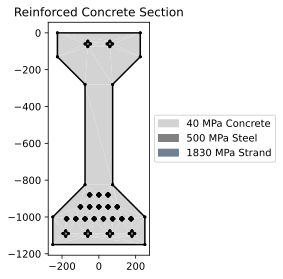

<AxesSubplot: title={'center': 'Reinforced Concrete Section'}>

In [3]:
geom = i_girder_section(girder_type=3, material=concrete)

# add top steel bars
geom = add_bar_rectangular_array(
    geometry=geom,
    area=450,
    material=steel,
    n_x=2,
    x_s=120,
    anchor=(-60, -60),
)

# add bottom steel bars
geom = add_bar_rectangular_array(
    geometry=geom,
    area=450,
    material=steel,
    n_x=4,
    x_s=120,
    anchor=(-180, -1090),
)

# prestressing
n_p1 = 3
n_p2 = 5
n_p3 = 8
d_p1 = -880
d_p2 = -945
d_p3 = -1010
x_s = 50

# add prestressing strand layer 1
geom = add_bar_rectangular_array(
    geometry=geom,
    area=100,
    material=strand,
    n_x=n_p1,
    x_s=x_s,
    anchor=((n_p1 / 2 - 0.5) * -x_s, d_p1),
)

# add prestressing strand layer 2
geom = add_bar_rectangular_array(
    geometry=geom,
    area=100,
    material=strand,
    n_x=n_p2,
    x_s=x_s,
    anchor=((n_p2 / 2 - 0.5) * -x_s, d_p2),
)


# add prestressing strand layer 3
geom = add_bar_rectangular_array(
    geometry=geom,
    area=100,
    material=strand,
    n_x=n_p3,
    x_s=x_s,
    anchor=((n_p3 / 2 - 0.5) * -x_s, d_p3),
)

conc_sec = ConcreteSection(geometry=geom)
conc_sec.plot_section()

In [4]:
# gross_props = conc_sec.get_gross_properties()
# gross_props.print_results(fmt=".3e")

In [5]:
# transformed_props = conc_sec.get_transformed_gross_properties(elastic_modulus=32.0e3)
# transformed_props.print_results(fmt=".3e")

In [6]:
N_ext = 100e3  # at d_f from top
M_ext = 1000e6  # at d_f from top
d_f = 300

cy = conc_sec.get_gross_properties().cy

M_ext_c = M_ext - N_ext * (cy + d_f)

N_p1 = n_p1 * pf
N_p2 = n_p2 * pf
N_p3 = n_p3 * pf
N_p = N_p1 + N_p2 + N_p3

M_p = N_p1 * (d_p1 - cy) + N_p2 * (d_p2 - cy) + N_p3 * (d_p3 - cy)

print(f"M_ext = {M_ext_c/1e6:.3f} kN.m")
print(f"M_p = {M_p/1e6:.3f} kN.m")

M_ext = 1031.743 kN.m
M_p = -695.764 kN.m


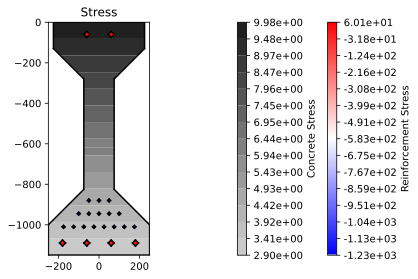

<AxesSubplot: title={'center': 'Stress'}>

In [7]:
res = conc_sec.calculate_uncracked_stress(n=N_ext + N_p, m_x=M_ext_c + M_p)
res.plot_stress()

In [8]:
from rich.pretty import pprint

pprint(res)

StressResult(
│   concrete_section=<concreteproperties.concrete_section.ConcreteSection object at 0x0000024BFF3E7130>,
│   concrete_analysis_sections=[
│   │   <concreteproperties.analysis_section.AnalysisSection object at 0x0000024BC626D370>,
│   │   <concreteproperties.analysis_section.AnalysisSection object at 0x0000024BFEFD6490>
│   ],
│   concrete_stresses=[
│   │   array([9.18183277, 9.98192206, 9.98192206, 9.18183277, 8.25865283,
│      6.18192522, 6.18192522, 8.25865283, 9.61265008, 9.52033208,
│      9.61265008, 9.70496807, 9.70496807, 9.61265008, 9.52033208,
│      9.61265008]),
│   │   array([6.18192522, 4.90443236, 3.82738909, 2.90420915, 2.90420915,
│      3.82738909, 4.90443236, 6.18192522, 3.27348113, 3.36579912,
│      3.27348113, 3.18116313, 3.18116313, 3.27348113, 3.36579912,
│      3.27348113, 3.27348113, 3.18116313, 3.27348113, 3.36579912,
│      3.36579912, 3.27348113, 3.18116313, 3.27348113, 4.56593305,
│      4.60945217, 4.56593305, 4.52241393, 4.52241393, 4.56593305,
│      4.60945217, 4.56593305, 4.56593305, 4.52241393, 4.56593305,
│      4.60945217, 4.20940753, 4.16588841, 4.12236928, 4.16588841,
│      4.16588841, 4.20940753, 4.16588841, 4.12236928, 4.12236928,
│      4.16588841, 4.20940753, 4.16588841, 4.16588841, 4.12236928,
│      4.16588841, 4.20940753, 4.20940753, 4.16588841, 4.12236928,
│      4.16588841, 3.76584376, 3.80936288, 3.76584376, 3.72232464,
│      3.72232464, 3.76584376, 3.80936288, 3.76584376, 3.76584376,
│      3.72232464, 3.76584376, 3.80936288, 3.80936288, 3.76584376,
│      3.72232464, 3.76584376, 3.76584376, 3.80936288, 3.76584376,
│      3.72232464, 3.72232464, 3.76584376, 3.80936288, 3.76584376,
│      3.76584376, 3.72232464, 3.76584376, 3.80936288, 3.80936288,
│      3.76584376, 3.72232464, 3.76584376])
│   ],
│   concrete_forces=[
│   │   (1313213.2369090575, -4.964356007903856e-15, 410.1779801419856),
│   │   (655480.1970507035, -1.4249180801925286e-14, -307.4231952710214)
│   ],
│   meshed_reinforcement_sections=[],
│   meshed_reinforcement_stresses=[],
│   meshed_reinforcement_forces=[],
│   lumped_reinforcement_geometries=[
│   │   <concreteproperties.pre.CPGeom object at 0x0000024BFF44DAF0>,
│   │   <concreteproperties.pre.CPGeom object at 0x0000024BFF44D6A0>,
│   │   <concreteproperties.pre.CPGeom object at 0x0000024BFF44DA60>,
│   │   <concreteproperties.pre.CPGeom object at 0x0000024BFF44DCA0>,
│   │   <concreteproperties.pre.CPGeom object at 0x0000024BFF44D970>,
│   │   <concreteproperties.pre.CPGeom object at 0x0000024BFF44DD00>
│   ],
│   lumped_reinforcement_stresses=[
│   │   60.07906298400387,
│   │   60.07906298400387,
│   │   20.45925703412777,
│   │   20.459257034127766,
│   │   20.459257034127766,
│   │   20.459257034127763
│   ],
│   lumped_reinforcement_strains=[
│   │   0.00030039531492001933,
│   │   0.00030039531492001933,
│   │   0.00010229628517063885,
│   │   0.00010229628517063884,
│   │   0.00010229628517063884,
│   │   0.00010229628517063881
│   ],
│   lumped_reinforcement_forces=[
│   │   (27035.578342801742, -60.00000000000001, 557.4305764561805),
│   │   (27035.578342801742, 59.99999999999999, 557.4305764561805),
│   │   (9206.665665357497, -180.0, -472.56942354381954),
│   │   (9206.665665357496, -60.00000000000001, -472.56942354381954),
│   │   (9206.665665357496, 59.99999999999999, -472.56942354381954),
│   │   (9206.665665357494, 180.0, -472.56942354381954)
│   ],
│   strand_geometries=[
│   │   <concreteproperties.pre.CPGeom object at 0x0000024BFF44DDC0>,
│   │   <concreteproperties.pre.CPGeom object at 0x0000024BFF44DF40>,
│   │   <concreteproperties.pre.CPGeom object at 0x0000024BFF44D610>,
│   │   <concreteproperties.pre.CPGeom object at 0x0000024BFF44D490>,
│   │   <concreteproperties.pre.CPGeom object at 0x0000024BFF44D4F0>,
│   │   <concreteproperties.pre.CPGeom object at 0x0000024BFF44D190>,
│   │   <concreteproperties.pre.CPGeom object at 0x0000024BFF44D520>,
│   │   <concreteproperties.pre.CPGeom object at 0x0000024BFF44DC40>,


In [10]:
print(res.sum_forces() / 1e3)

99.99999999999774


In [12]:
print(res.sum_moments()[2] / 1e6)

1031.7388487519013
